#Telecom X - Customer Churn Study

The company is experiencing a high level of customer churn and is seeking to identify the causes driving this behavior.

This study includes:

* Data acquisition and processing through an external API.

* Implementation of the ETL (Extract, Transform, and Load) process to cleanse and organize the information.

* Development of key visualizations to detect relevant patterns and behaviors.

* Data exploration (EDA) and preparation of a report with significant findings.

#📌 Extraction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# RAW URL of the JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Load JSON directly from the URL into a DataFrame
df = pd.read_json(url)

#🔧 Transformation

In [ ]:
# 1. Display the rows of the DataFrame

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# 2. Get general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# 3. Check data types of each column
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [ ]:
# 4. Statistical summary of numerical columns
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
# 5. Load the dictionary from GitHub
dict_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md"
dict = pd.read_csv(dict_url, sep=":", header=None, names=["Variable", "Description"])

# 6. Display the first rows of the dictionary
dict.head()

,Variable,Description
0,#### Diccionario de datos,NaN
1,- `customerID`,número de identificación único de cada cliente
2,- `Churn`,si el cliente dejó o no la empresa
3,- `gender`,género (masculino y femenino)
4,- `SeniorCitizen`,información sobre si un cliente tiene o no un...


In [ ]:
#7. Automatically expand columns containing dictionaries
del dict

# Detect columns that contain at least one dictionary
dict_columns = []

for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        dict_columns.append(col)

print("=== Columns containing dictionaries (nested JSON) ===")
print(dict_columns)

=== Columns containing dictionaries (nested JSON) ===
['customer', 'phone', 'internet', 'account']


In [ ]:
# 8. Expand and join nested columns

for col in dict_columns:
    expanded = df[col].apply(pd.Series)
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    # 8.1. Join them to the main DataFrame and delete the originals.
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

print("\n=== DataFrame after expanding columns ===")
print(df.head())


=== DataFrame after expanding columns ===
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes              

In [ ]:
# 9. Duplicate rows
print("\n=== Duplicate rows ===")
# Detect if there are still columns with dictionaries or lists
unhashable_cols = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (dict, list))).any():
        unhashable_cols.append(col)

if unhashable_cols:
    print("\n⚠️ There are still columns with dict or list type values:")
    print(unhashable_cols)
    print("These columns will be temporarily removed for analysis operations.")
    df_hashable = df.drop(columns=unhashable_cols)
else:
    df_hashable = df

print(df_hashable.duplicated().sum())


=== Duplicate rows ===

⚠️ There are still columns with dict or list type values:
['account_Charges']
These columns will be temporarily removed for analysis operations.
0


In [ ]:
print(df.columns.tolist())  # to confirm the exact name of the column

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges']


### Basic DataFrame Validation and Cleaning

In [ ]:
# 1. Parse dataset

# Parse the 'account_Charges' column
# If the value is a dict, we convert it, if it is a string with a dict, we evaluate it
import ast
import numpy as np

def parse_account_charges(value):
    if isinstance(value, dict):
        return value
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)  # safe for strings representing dicts
        except:
            return {}
    return {}

# Convert entire column to real dicts
df['account_Charges_parsed'] = df['account_Charges'].apply(parse_account_charges)

# Extract values from 'MonthlyCharges'
def safe_float_monthly(x):
    if isinstance(x, dict):
        monthly = x.get('Monthly')
        try:
            return float(monthly)
        except:
            return np.nan
    return np.nan

df['MonthlyCharges'] = df['account_Charges_parsed'].apply(safe_float_monthly)

# Extract values from 'TotalCharges'
def safe_float_total(x):
    if isinstance(x, dict):
        total = x.get('Total')
        try:
            return float(total.strip()) if isinstance(total, str) else float(total)
        except:
            return np.nan
    return np.nan

df['TotalCharges'] = df['account_Charges_parsed'].apply(safe_float_total)

# Check for nulls and types
print("Null values after processing:\n", df[['MonthlyCharges', 'TotalCharges']].isnull().sum())
print("\nUpdated data types:\n", df[['MonthlyCharges', 'TotalCharges']].dtypes)

# Delete original columns
df.drop(columns=['account_Charges', 'account_Charges_parsed'], inplace=True)


Null values after processing:
 MonthlyCharges     0
TotalCharges      11
dtype: int64

Updated data types:
 MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [ ]:
# 2. Recalculate rows where TotalCharges is NaN
# Impute TotalCharges as MonthlyCharges * customer_tenure

# See how many are missing
missing_total = df['TotalCharges'].isnull()
print(f"Rows with missing TotalCharges: {missing_total.sum()}")

# Recalculate only where missing
df.loc[missing_total, 'TotalCharges'] = (
    df.loc[missing_total, 'MonthlyCharges'] * df.loc[missing_total, 'customer_tenure']
)

# Check again
print(f"Rows with missing TotalCharges after imputation: {df['TotalCharges'].isnull().sum()}")

Rows with missing TotalCharges: 11
Rows with missing TotalCharges after imputation: 0


In [ ]:
# 3. Check for nulls and types again
print("Null values after processing:\n", df[['MonthlyCharges', 'TotalCharges']].isnull().sum())
print("\nUpdated data types:\n", df[['MonthlyCharges', 'TotalCharges']].dtypes)


Null values after processing:
 MonthlyCharges    0
TotalCharges      0
dtype: int64

Updated data types:
 MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [ ]:
# === DATA QUALITY ANALYSIS === #

# 4. General information
print("\n=== General information ===")
print(df.info())

# 5. Null values
print("\n=== Missing values by column ===")
print(df.isnull().sum())



=== General information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSuppor

In [ ]:
# 6. Unique types per column
print("\n=== Unique types per column ===")
for col in df.columns:
    unique_types = pd.Series(df[col].dropna().map(type).unique())
    counts = df[col].dropna().map(type).value_counts()
    print(f"\nColumn: {col} → Unique types :")
    print(counts.to_dict())


=== Unique types per column ===

Column: customerID → Unique types :
{<class 'str'>: 7267}

Column: Churn → Unique types :
{<class 'str'>: 7267}

Column: customer_gender → Unique types :
{<class 'str'>: 7267}

Column: customer_SeniorCitizen → Unique types :
{<class 'int'>: 7267}

Column: customer_Partner → Unique types :
{<class 'str'>: 7267}

Column: customer_Dependents → Unique types :
{<class 'str'>: 7267}

Column: customer_tenure → Unique types :
{<class 'int'>: 7267}

Column: phone_PhoneService → Unique types :
{<class 'str'>: 7267}

Column: phone_MultipleLines → Unique types :
{<class 'str'>: 7267}

Column: internet_InternetService → Unique types :
{<class 'str'>: 7267}

Column: internet_OnlineSecurity → Unique types :
{<class 'str'>: 7267}

Column: internet_OnlineBackup → Unique types :
{<class 'str'>: 7267}

Column: internet_DeviceProtection → Unique types :
{<class 'str'>: 7267}

Column: internet_TechSupport → Unique types :
{<class 'str'>: 7267}

Column: internet_StreamingTV

In [ ]:
# 7. Inconsistencies in categorical columns
print("\n=== Unique values in categorical columns ===")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


=== Unique values in categorical columns ===

Column: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Column: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Column: customer_gender
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64

Column: customer_Partner
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64

Column: customer_Dependents
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Column: phone_PhoneService
phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Column: phone_MultipleLines
phone_MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Column: internet_InternetService
internet_InternetService
Fiber optic    3198
DSL      

In [ ]:
# 8. Clear 'Churn' column
df['Churn'] = df['Churn'].str.strip()
df['Churn'] = df['Churn'].replace('', np.nan)
# See how many are left null
print(df['Churn'].isnull().sum())

224


In [ ]:
#9. Redundant category 'No phone service. Replace with "No"

internet_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies'
]

for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')


#🔎 Data standardization and transformation

In [ ]:
# 1. Map binary columns to 0 and 1
binary_cols = [
    'Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# 2.Custom replacements for some columns
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].map({'Male': 1, 'Female': 0})
df['phone_MultipleLines'] = df['phone_MultipleLines'].replace({'No phone service': 'No'})
df['phone_MultipleLines'] = df['phone_MultipleLines'].map({'Yes': 1, 'No': 0})

# Map other binaries (Yes/No)
other_binary_cols = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in other_binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 3. One-hot encoding for categorical columns with more than 2 values
multi_cat_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]

df_original = df.copy()
df = pd.get_dummies(df, columns=multi_cat_cols, prefix=['Internet', 'Contract', 'Payment'], dtype=int)


# 4. Check that there are no more non-numeric values
print(df.dtypes)
print("\nRemaining nulls by column:\n", df.isnull().sum())


customerID                            object
Churn                                float64
customer_gender                        int64
customer_SeniorCitizen                 int64
customer_Partner                       int64
customer_Dependents                    int64
customer_tenure                        int64
phone_PhoneService                     int64
phone_MultipleLines                    int64
internet_OnlineSecurity                int64
internet_OnlineBackup                  int64
internet_DeviceProtection              int64
internet_TechSupport                   int64
internet_StreamingTV                   int64
internet_StreamingMovies               int64
account_PaperlessBilling               int64
MonthlyCharges                       float64
TotalCharges                         float64
Internet_DSL                           int64
Internet_Fiber optic                   int64
Internet_No                            int64
Contract_Month-to-month                int64
Contract_O

In [ ]:
# 5. Save CSV file with data after ETL
df.to_csv("processed_data.csv", index=False)

#📊 Loading and analysis

### Descriptive Analysis

In [ ]:
# 1. Descriptive analysis of numerical columns
description_general = df.describe()

# Show the result
print(description_general)


             Churn  customer_gender  customer_SeniorCitizen  customer_Partner  \
count  7043.000000      7267.000000             7267.000000       7267.000000   
mean      0.265370         0.505711                0.162653          0.484106   
std       0.441561         0.500002                0.369074          0.499782   
min       0.000000         0.000000                0.000000          0.000000   
25%       0.000000         0.000000                0.000000          0.000000   
50%       0.000000         1.000000                0.000000          0.000000   
75%       1.000000         1.000000                0.000000          1.000000   
max       1.000000         1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7267.000000      7267.000000         7267.000000   
mean              0.300124        32.346498            0.902711   
std               0.458343        24.571773            0.296371   
mi

In [ ]:
# 2. Supplementary summary
print("Null values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nUnique values per column:\n", df.nunique())


Null values per column:
 customerID                             0
Churn                                224
customer_gender                        0
customer_SeniorCitizen                 0
customer_Partner                       0
customer_Dependents                    0
customer_tenure                        0
phone_PhoneService                     0
phone_MultipleLines                    0
internet_OnlineSecurity                0
internet_OnlineBackup                  0
internet_DeviceProtection              0
internet_TechSupport                   0
internet_StreamingTV                   0
internet_StreamingMovies               0
account_PaperlessBilling               0
MonthlyCharges                         0
TotalCharges                           0
Internet_DSL                           0
Internet_Fiber optic                   0
Internet_No                            0
Contract_Month-to-month                0
Contract_One year                      0
Contract_Two year               

In [ ]:
# 3. Creating a Daily Accounts Column

# Create the Daily_Accounts column as a daily billing estimate
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30

# Review a summary of the new column
df['Cuentas_Diarias'].describe()

df.describe()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,...,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,...,0.440072,0.217559,0.551122,0.209027,0.239851,0.218660,0.215770,0.336452,0.229118,2.157337
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,...,0.496430,0.412614,0.497414,0.406642,0.427022,0.413366,0.411384,0.472528,0.420294,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


### Evasion distribution

/tmp/ipython-input-74-2886194962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df, x='Churn', palette=colors)
/tmp/ipython-input-74-2886194962.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Remains', 'Abandon'])


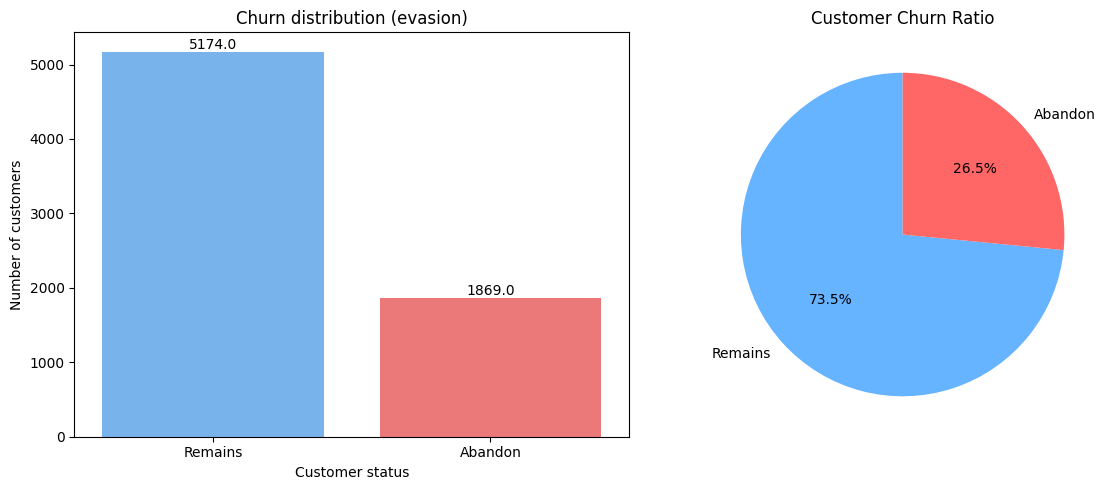

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors
colors = ['#66b3ff', '#ff6666']  # blue and red

# Filter and sort values
churn_counts = df[df['Churn'].isin([0, 1])]['Churn'].value_counts().sort_index()

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
sns.countplot(ax=axes[0], data=df, x='Churn', palette=colors)
axes[0].set_title('Churn distribution (evasion)')
axes[0].set_xlabel('Customer status')
axes[0].set_ylabel('Number of customers')
axes[0].set_xticklabels(['Remains', 'Abandon'])

# Display values above bars
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10)

# Pie chart
axes[1].pie(
    churn_counts,
    labels=['Remains', 'Abandon'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[1].set_title('Customer Churn Ratio')

# General adjustment
plt.tight_layout()
plt.show()


### Evasion count by categorical variables

/tmp/ipython-input-75-328304259.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-75-328304259.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-75-328304259.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-75-328304259.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-75-328304259.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-75-328304259.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


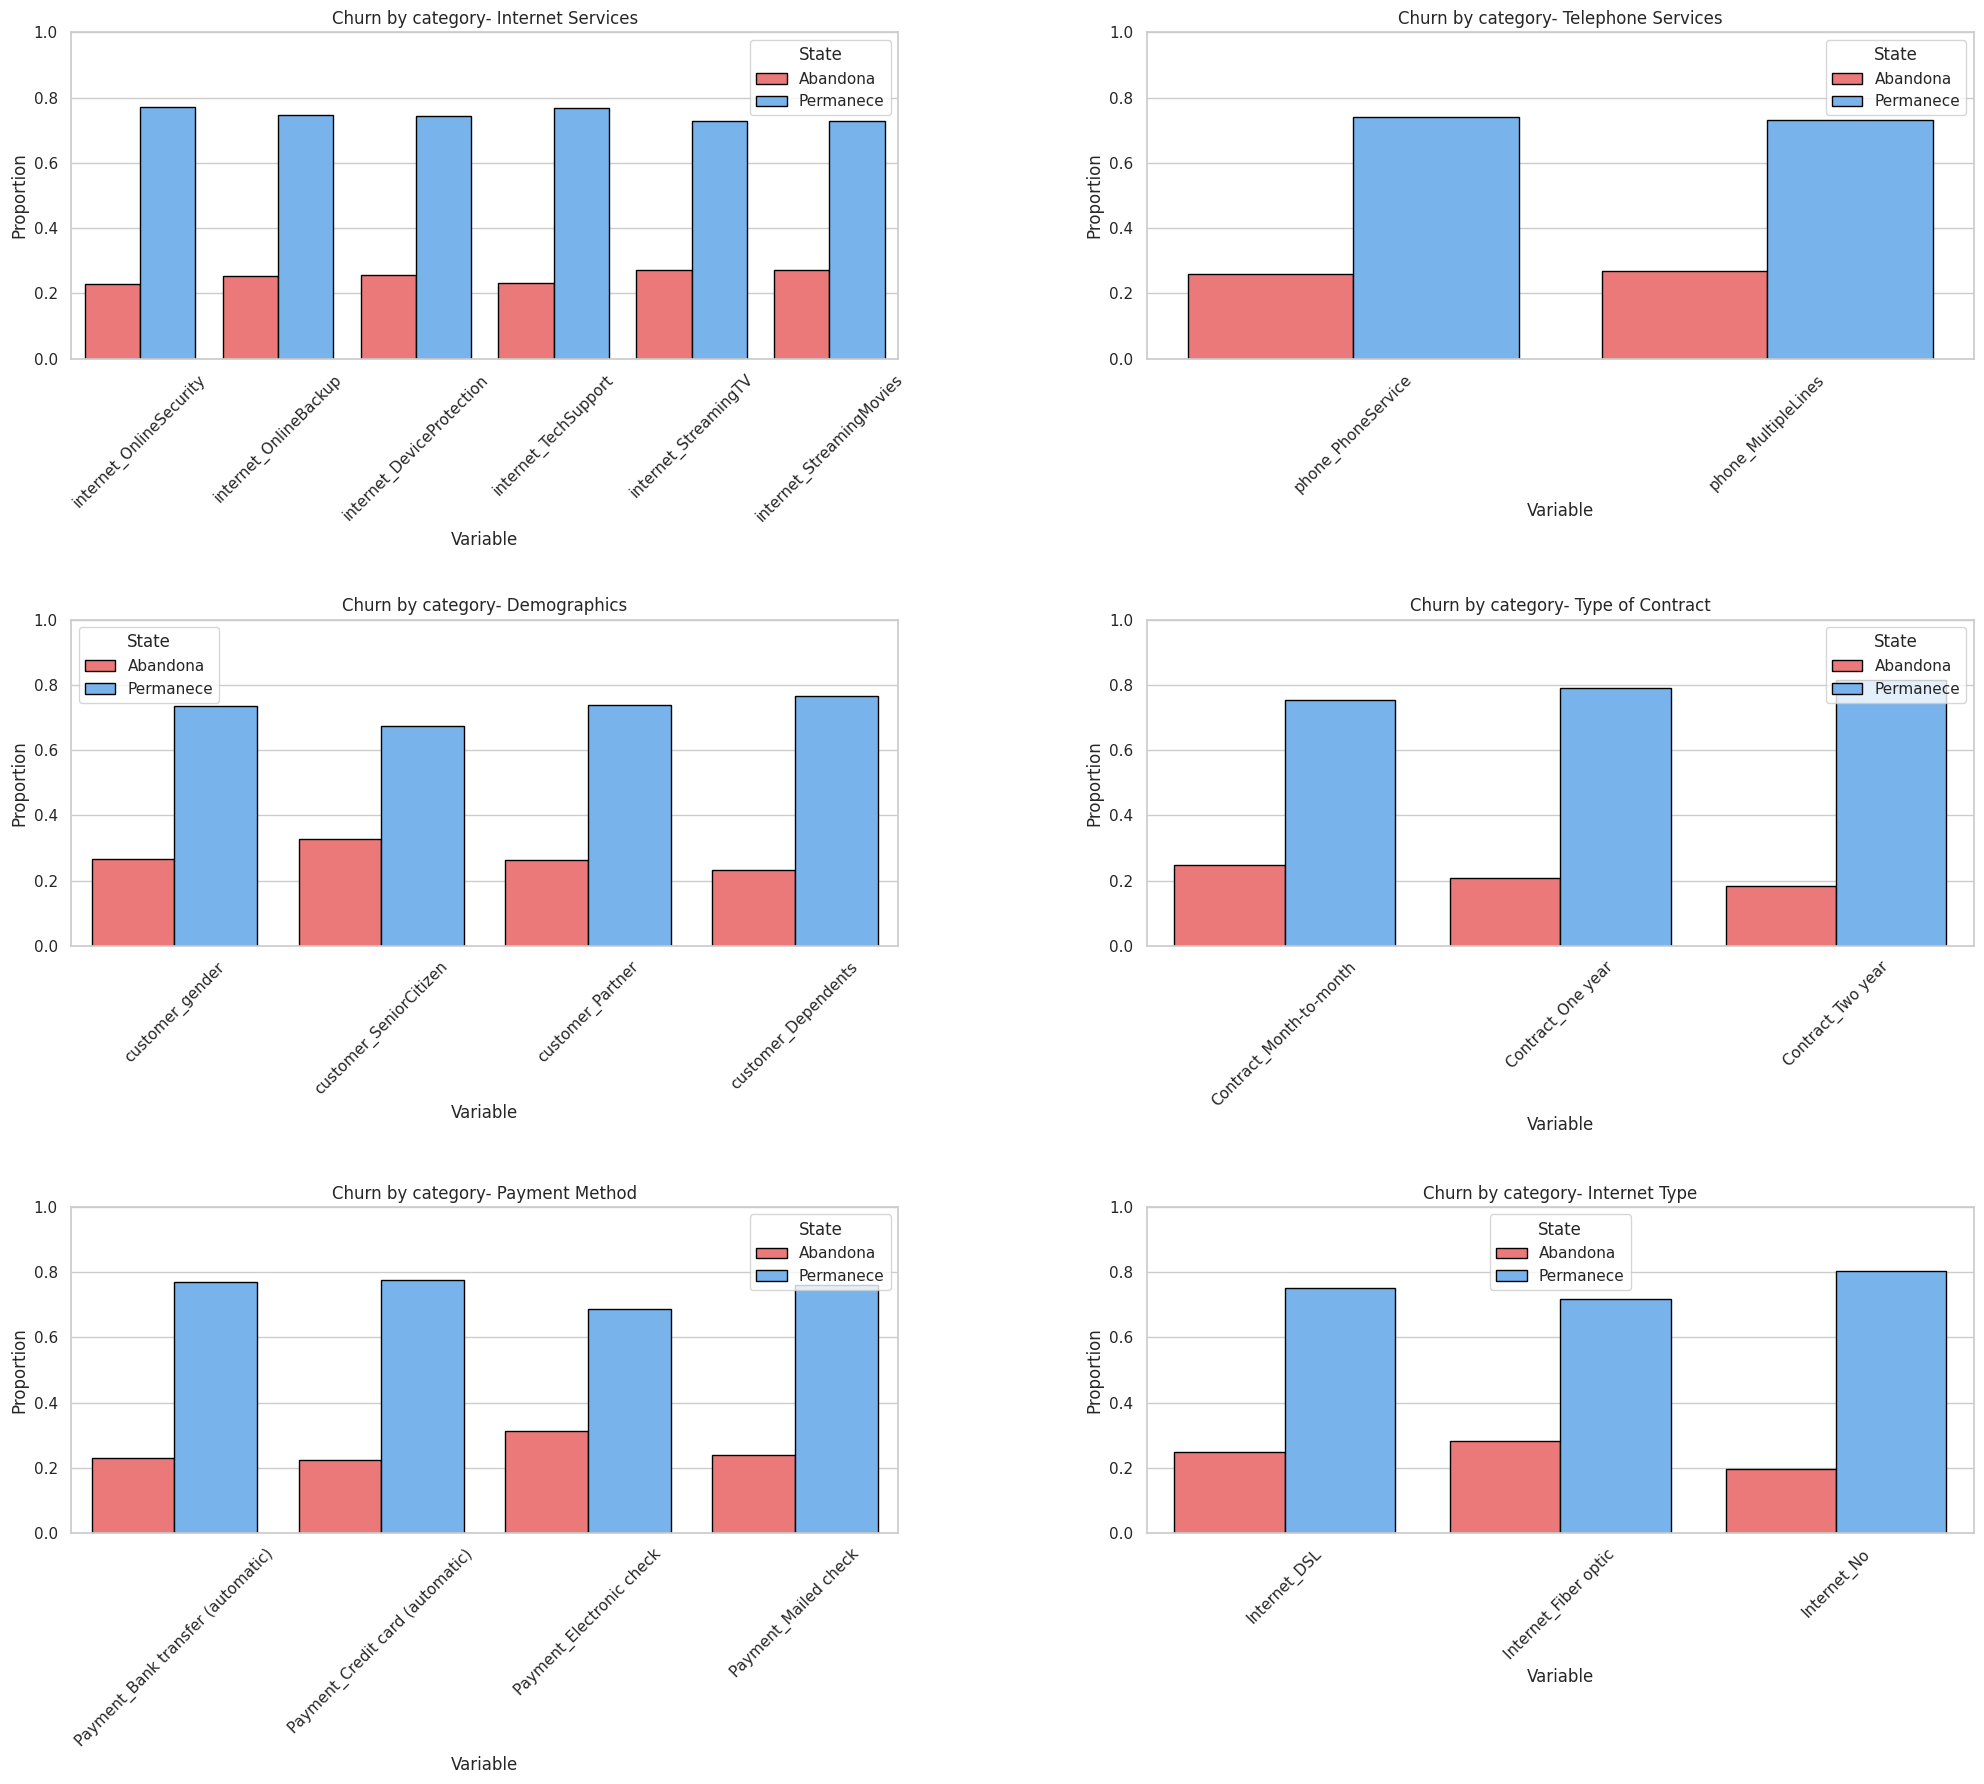

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

sns.set(style="whitegrid")

# Column groups
servicios_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

phone_cols = ['phone_PhoneService', 'phone_MultipleLines']

demo_cols = ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents']

contract_cols = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']

payment_cols = [
    'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
    'Payment_Electronic check', 'Payment_Mailed check'
]

internet_cols = ['Internet_DSL', 'Internet_Fiber optic', 'Internet_No']

# Custom colors for "Stay" (blue) and "Leave" (red)
colors = ['#ff6666', '#66b3ff']  # red, blue

df_plot = df.copy()
df_plot['Churn_str'] = df_plot['Churn'].map({0: 'Permanece', 1: 'Abandona'})

# Function to graph a group on a given axis
def plot_group_on_axis(ax, group_cols, title):
    plot_data = []

    for col in group_cols:
        if col not in df_plot.columns:
            continue

        df_plot[col] = df_plot[col].map({0:'No', 1:'Sí'}) if set(df_plot[col].dropna().unique()) <= {0,1} else df_plot[col]

        temp = df_plot.groupby([col, 'Churn_str']).size().reset_index(name='count')
        totals = temp.groupby(col)['count'].transform('sum')
        temp['proportion'] = temp['count'] / totals
        temp['variable'] = col
        temp.rename(columns={col:'category'}, inplace=True)
        plot_data.append(temp)

    plot_data = pd.concat(plot_data, ignore_index=True)

    sns.barplot(
        data=plot_data,
        x='variable',
        y='proportion',
        hue='Churn_str',
        palette=colors,
        ci=None,
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f'Churn by category- {title}')
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Variable')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='State')

# List of groups and their titles
groups = [
    (servicios_cols, 'Internet Services'),
    (phone_cols, 'Telephone Services'),
    (demo_cols, 'Demographics'),
    (contract_cols, 'Type of Contract'),
    (payment_cols, 'Payment Method'),
    (internet_cols, 'Internet Type')
]

# Prepare figure with 2 columns
n_cols = 2
n_rows = math.ceil(len(groups) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

# Plot each group in a subplot
for i, (cols, title) in enumerate(groups):
    plot_group_on_axis(axes[i], cols, title)

# Remove excess axes if there are any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()



### Evasion counting by numerical variables

Boxplots (box plots)

/tmp/ipython-input-76-16964901.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_plot, palette=colors, ax=axes[i])
/tmp/ipython-input-76-16964901.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-76-16964901.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_plot, palette=colors, ax=axes[i])
/tmp/ipython-input-76-16964901.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


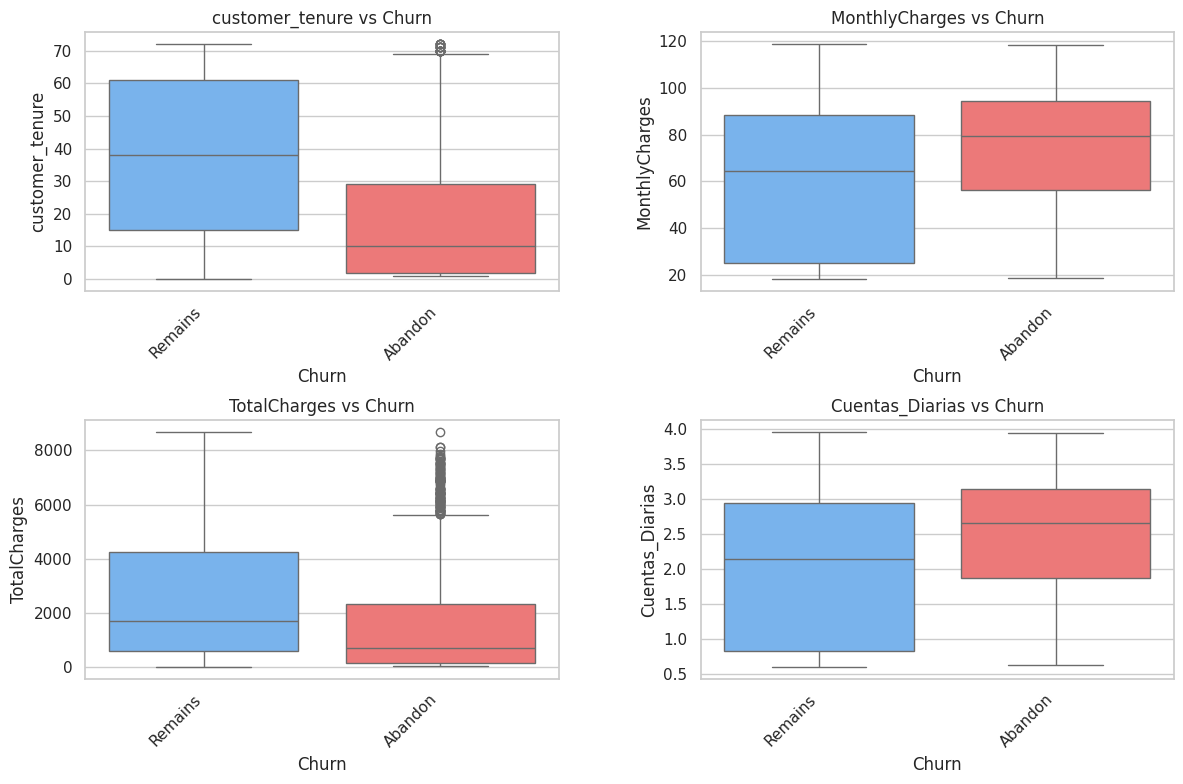

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid")

numeric_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']

n_cols = 2
n_rows = math.ceil(len(numeric_vars) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Custom colors for "Stay" (blue) and "Leave" (red)
colors = ['#66b3ff', '#ff6666']

# Create copy with Churn mapped to "Stay" and "Leave"
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].map({0: 'Remains', 1: 'Abandon'})

for i, col in enumerate(numeric_vars):
    sns.boxplot(x='Churn', y=col, data=df_plot, palette=colors, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

    # Rotate X labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


### Evasion counting by binary variables

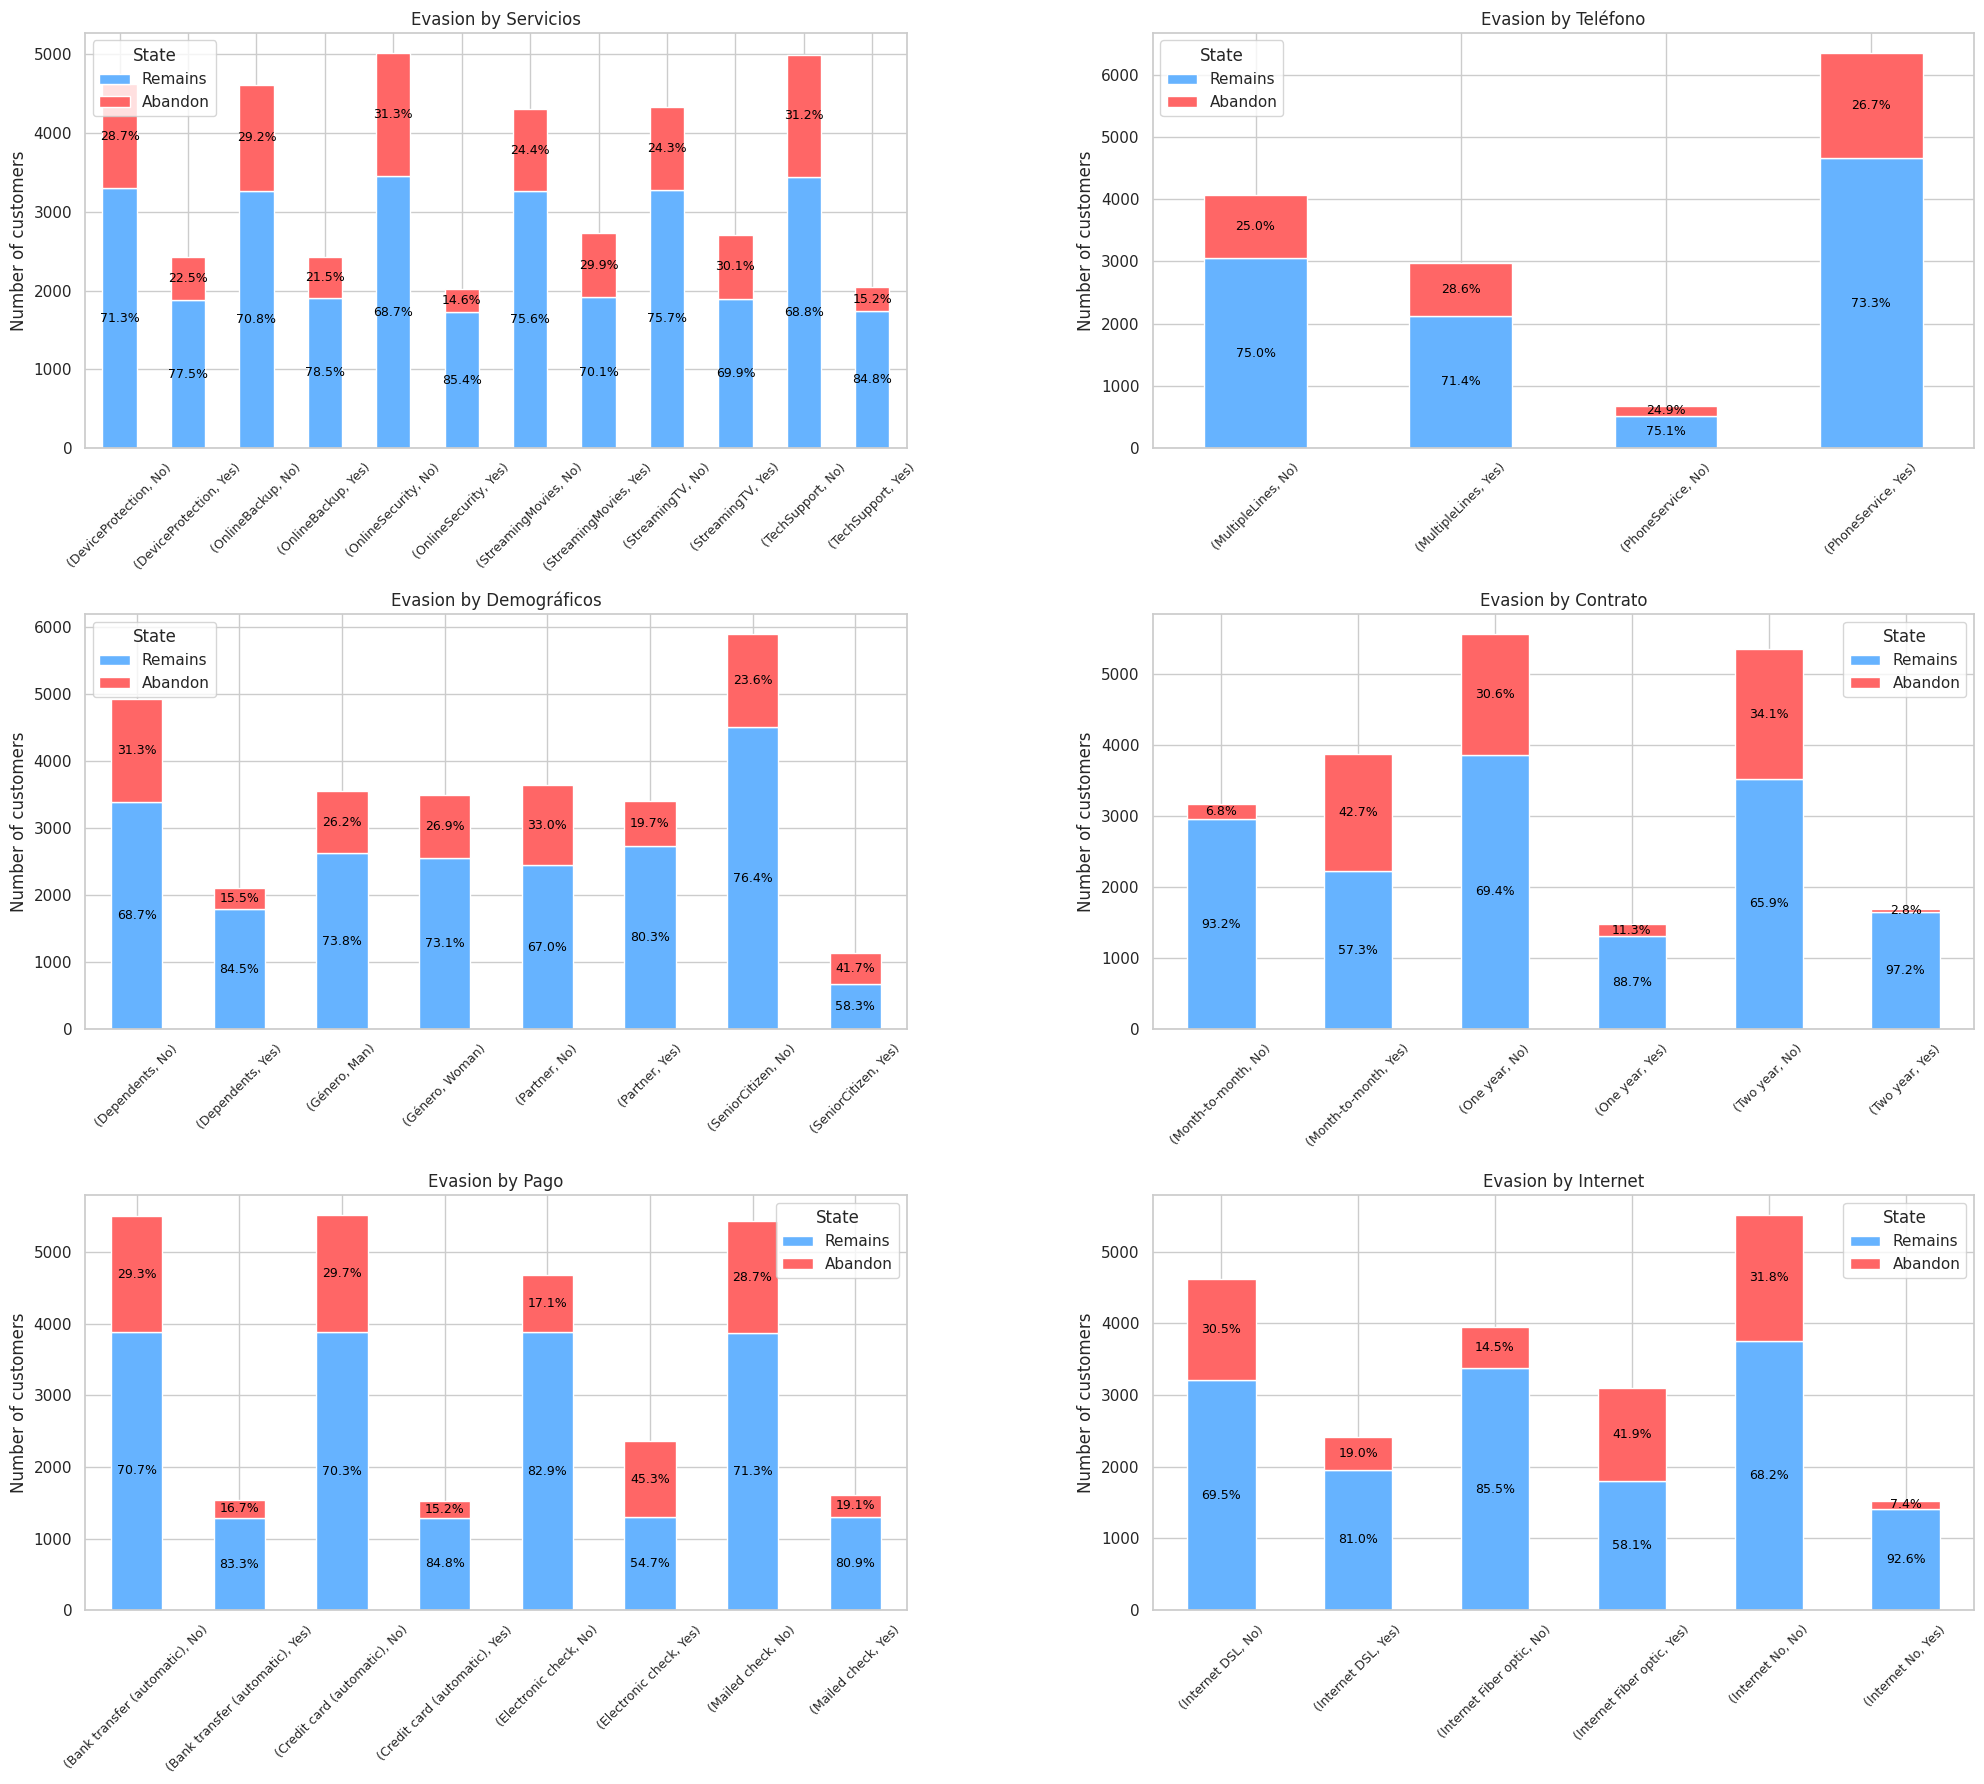

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

sns.set(style="whitegrid")
colors = ['#66b3ff', '#ff6666']  # blue and red

# Define groups and their columns
categories = {
    'Servicios': [
        'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
        'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
    ],
    'Teléfono': ['phone_PhoneService', 'phone_MultipleLines'],
    'Demográficos': ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents'],
    'Contrato': ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
    'Pago': [
        'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
        'Payment_Electronic check', 'Payment_Mailed check'
    ],
    'Internet': ['Internet_DSL', 'Internet_Fiber optic', 'Internet_No']
}

# Create Churn Column with Labels
df_plot = df.copy()
df_plot['Churn_Label'] = df_plot['Churn'].map({0: 'Remains', 1: 'Abandon'})

ncols = 2
nrows = math.ceil(len(categories) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 10, nrows * 6))
axes = axes.flatten()

for i, (cat_name, cols) in enumerate(categories.items()):
    ax = axes[i]

    data = []
    for col in cols:
        if col not in df_plot.columns:
            continue

        tmp = df_plot[[col, 'Churn_Label']].copy()

        # Adjust subcategory label
        if col == 'customer_gender':
            tmp['Variable'] = 'Género'
            tmp['Subcategory'] = tmp[col].map({0: 'Woman', 1: 'Man'})
        else:
            variable_name = col.replace('_', ' ').replace('customer ', '').replace('internet ', '').replace('phone ', '').replace('Payment ', '').replace('Contract ', '')
            tmp['Variable'] = variable_name
            tmp['Subcategory'] = tmp[col].map({0: 'No', 1: 'Yes'})

        tmp = tmp[['Variable', 'Subcategory', 'Churn_Label']]
        tmp.columns = ['Variable', 'Subcategory', 'Churn']
        data.append(tmp)

    if data:
        cat_df = pd.concat(data)

        # Count values by subcategory and churn
        counts = cat_df.groupby(['Variable', 'Subcategory', 'Churn']).size().unstack(fill_value=0)
        counts = counts.reindex(columns=['Remains', 'Abandon'])

        # Calculate percentages
        percentages = counts.div(counts.sum(axis=1), axis=0) * 100

        # Graph
        bars = counts.plot(kind='bar', stacked=True, color=colors, ax=ax)

        # Add % above the bars
        for idx, row in counts.iterrows():
            total = row.sum()
            for j, val in enumerate(row):
                percent = percentages.loc[idx].iloc[j]
                if val > 0:
                    ax.text(
                        x=bars.containers[j][list(counts.index).index(idx)].get_x() +
                          bars.containers[j][list(counts.index).index(idx)].get_width() / 2,
                        y=row[:j+1].sum() - val / 2,
                        s=f'{percent:.1f}%',
                        ha='center',
                        va='center',
                        fontsize=9,
                        color='black'
                    )

        ax.set_title(f'Evasion by {cat_name}')
        ax.set_xlabel('')
        ax.set_ylabel('Number of customers')
        ax.legend(title='State')
        ax.tick_params(axis='x', rotation=45, labelsize=9)
    else:
        ax.axis('off')  # If there is no valid data, turn off that subplot

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


### Heatmap of evasion rates by variable and subcategories

* Shows the churn rate (%) for each subcategory, organized by variable.

* Useful for identifying strong churn patterns.

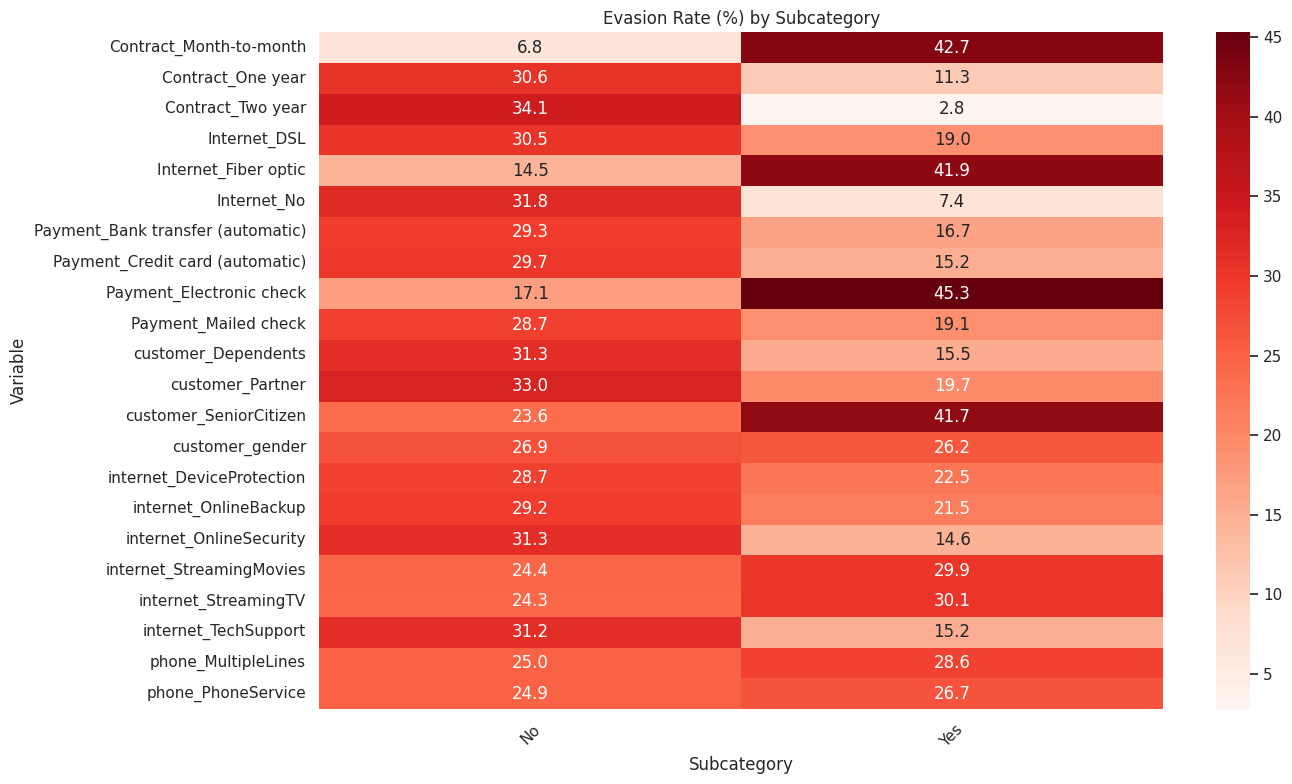

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate churn rate by variable and subcategory
churn_rates = []

for cat_name, cols in categories.items():
    for col in cols:
        if col not in df.columns:
            continue
        temp = df[[col, 'Churn']].copy()
        if set(temp[col].dropna().unique()) <= {0, 1}:
            temp[col] = temp[col].map({0: 'No', 1: 'Yes'})
        rates = temp.groupby(col)['Churn'].mean() * 100
        for val, rate in rates.items():
            churn_rates.append([cat_name, col, val, round(rate, 1)])

heat_df = pd.DataFrame(churn_rates, columns=['Category', 'Variable', 'Subcategory', 'Churn %'])

# Pivot para heatmap
pivot = heat_df.pivot_table(index='Variable', columns='Subcategory', values='Churn %')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".1f")
plt.title('Evasion Rate (%) by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sankey diagram with descriptive labels

* Gender
* Contract
* Internet
* Evasion

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Copy of the original dataframe
df_sankey = df.copy()

# Map human-readable names
df_sankey['Churn'] = df_sankey['Churn'].map({0: 'Remains', 1: 'Abandon'})
df_sankey['customer_gender'] = df_sankey['customer_gender'].map({0: 'Woman', 1: 'Man'})

# Internet
def internet_tipo(row):
    if row['Internet_DSL'] == 1:
        return 'DSL'
    elif row['Internet_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['Internet_No'] == 1:
        return 'No internet'
    else:
        return 'unknown'

df_sankey['Internet'] = df_sankey.apply(internet_tipo, axis=1)

# Group
sankey_df = df_sankey.groupby(['customer_gender', 'Internet', 'Churn']).size().reset_index(name='count')

# Unique tags
labels = pd.unique(
    sankey_df['customer_gender'].tolist() +
    sankey_df['Internet'].tolist() +
    sankey_df['Churn'].tolist()
).tolist()
label_indices = {label: i for i, label in enumerate(labels)}

# Links for each transition
source1 = sankey_df['customer_gender'].map(label_indices)
target2 = sankey_df['Internet'].map(label_indices)
source3 = sankey_df['Internet'].map(label_indices)
target3 = sankey_df['Churn'].map(label_indices)

# Values (we repeat for each stage)
value = sankey_df['count']
sources = list(source1) + list(source3)
targets = list(target2) + list(target3)
values = list(value) * 2

# Custom color palette for nodes (labels)
node_colors = {
    'Woman': '#a6cee3', 'Man': '#1f78b4',
    'DSL': '#fdbf6f', 'Fiber optic': '#ff7f00', 'Sin internet': '#b15928',
    'Remains': '#66b3ff', 'Abandon': '#ff6666'
}
node_color_list = [node_colors.get(label, '#cccccc') for label in labels]

# Colors for links (we only highlight those ending in "Leave" and "Stay")
link_colors = []
for s, t in zip(sources, targets):
    if labels[t] == 'Abandon':
        link_colors.append('#ff6666')
    elif labels[t] == 'Remains':
        link_colors.append('#66b3ff')
    else:
        link_colors.append('lightgray')

# Create Sankey Chart
fig_Sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_color_list
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

# Aesthetics of the graph
fig_Sankey.update_layout(
    title_text="📊 Customer Flow by Gender → Internet → Churn",
    font=dict(size=12, family='Arial'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=10, r=10, t=60, b=10)
)

fig_Sankey.show()


/tmp/ipython-input-81-3943150013.py:28: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  labels = pd.unique(


### Correlation Heat Map

The 10 most correlated variables are shown.



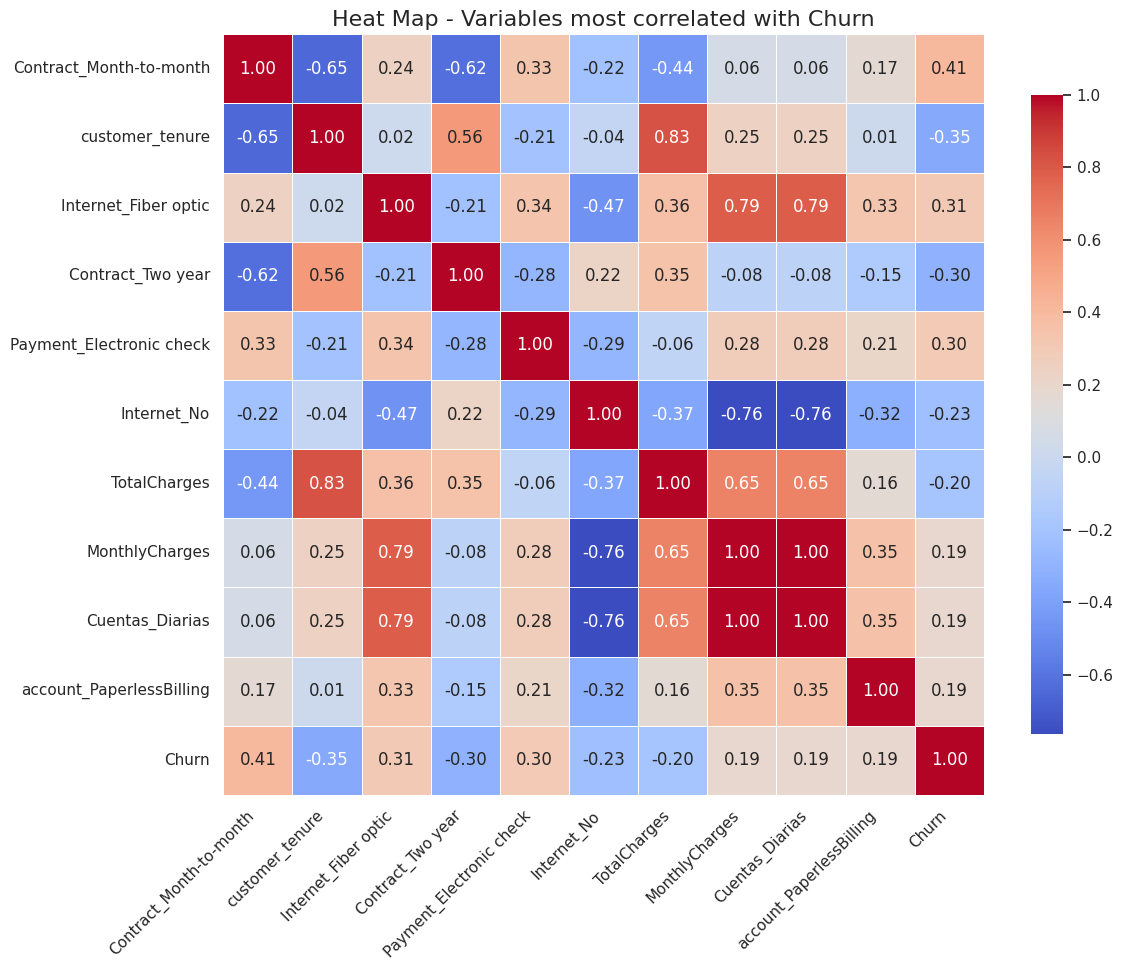

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Churn' is numeric
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({0: 0, 1: 1})

# Select numeric columns
numeric_df = df_corr.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Sort by correlation with 'Churn'
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

# Select the 10 most correlated variables
top_corr_vars = churn_corr.head(10).index.tolist() + ['Churn']
filtered_corr = corr_matrix.loc[top_corr_vars, top_corr_vars]

# Create the enhanced heat map
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            cbar_kws={'shrink': .8})
plt.title('Heat Map - Variables most correlated with Churn', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#📄Final report



## 1️⃣ Introduction

In the competitive telecommunications market, a company's ability to retain its customers is critical to its success and profitability. This analysis focuses on understanding the factors that cause customer churn, a phenomenon that directly impacts the company's revenue and operational efficiency.

By examining historical customer data, we seek to uncover which characteristics and behaviors are linked to churn. By identifying these patterns, specific actions can be designed to anticipate customer loss and improve retention rates, thus contributing to the stability and sustained growth of the business.

## 2️⃣ Data Cleansing and Processing:

🔹 **Data Loading:**
The data was imported from a JSON file provided by Telecom X. The information contained customer records and their contractual, usage, and demographic characteristics.

🔹 **Column Name Normalization:**
Spaces were removed and column names were standardized to facilitate subsequent manipulation, ensuring consistency throughout the DataFrame.

🔹 **Data Type Conversion:**
Columns such as TotalCharges were converted to numeric types, correcting records with formatting errors (e.g., empty cells or incorrectly entered values).

🔹**Null Value Handling:**
Records with missing values in key variables, such as customer ID or financial data, were eliminated or imputed, as they could affect the behavioral analysis.

🔹 **Duplicate Check:**
Duplicate records were checked and removed to avoid bias in statistical calculations and visualizations.

🔹 **Categorical Variable Transformation:**
Binary variables were converted to 0/1 format for modeling, and then remapped to labels such as "Stay" or "Leave" to facilitate interpretation in the graphs.

🔹 **Category Consistency Check:**
Responses for categorical variables such as Gender, Churn, Contract Type, and Payment Method were reviewed, standardizing misspelled or inconsistent values.


## 3️⃣ Exploratory Data Analysis:

Statistical and visual techniques were applied to examine the behavior of the variables and discover significant relationships with customer churn. This process allowed us to identify trends, atypical distributions, and potential key indicators related to churn.

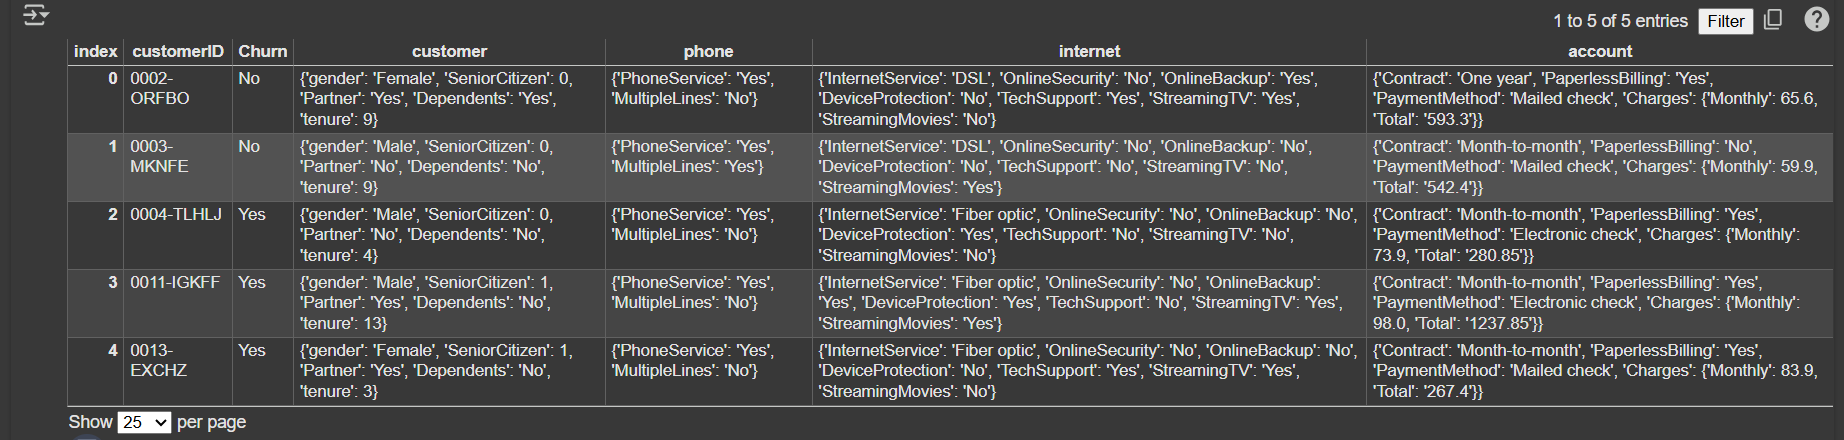

### General distribution of evasion

Approximately 26.5% of customers have canceled service, 1,869 customers, as shown in the following graph:

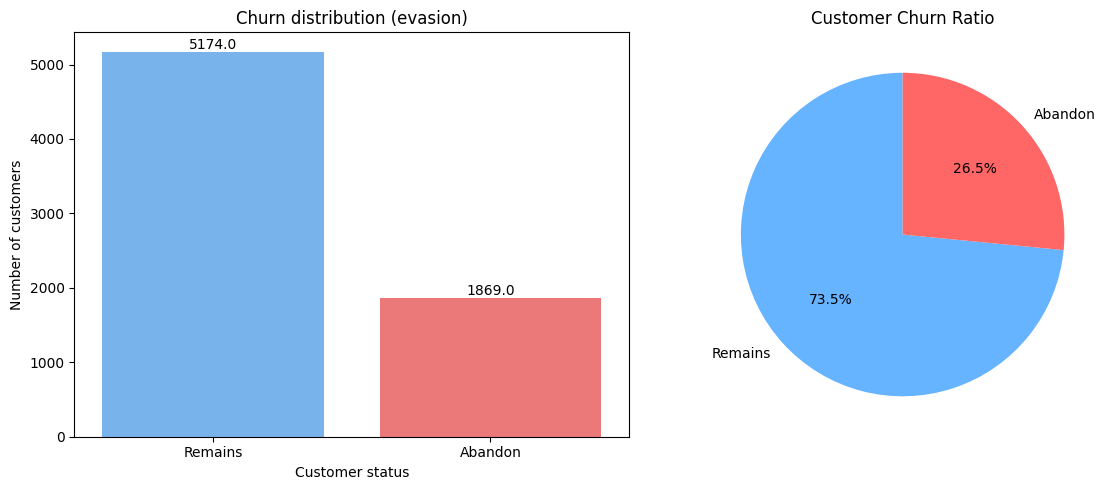

### Analysis by Categorical Variables

The connection between churn and factors represented by categorical variables was investigated.

* Internet Services: No significant differences were identified in churn for Internet Services.

* Telephone Services: No significant differences were identified in churn for Telephone Services.

* **Demographics:** A higher percentage of senior customers can be observed who churn.

* **Contract Type:** Customers with month-to-month contracts are the most likely to churn.

* **Payment Method:** Users who pay electronically show a greater propensity to churn than those who choose other payment methods.

* **Internet Type:** The Internet Type category highlights the Fiber Optic subcategory due to its high cancellation rate.

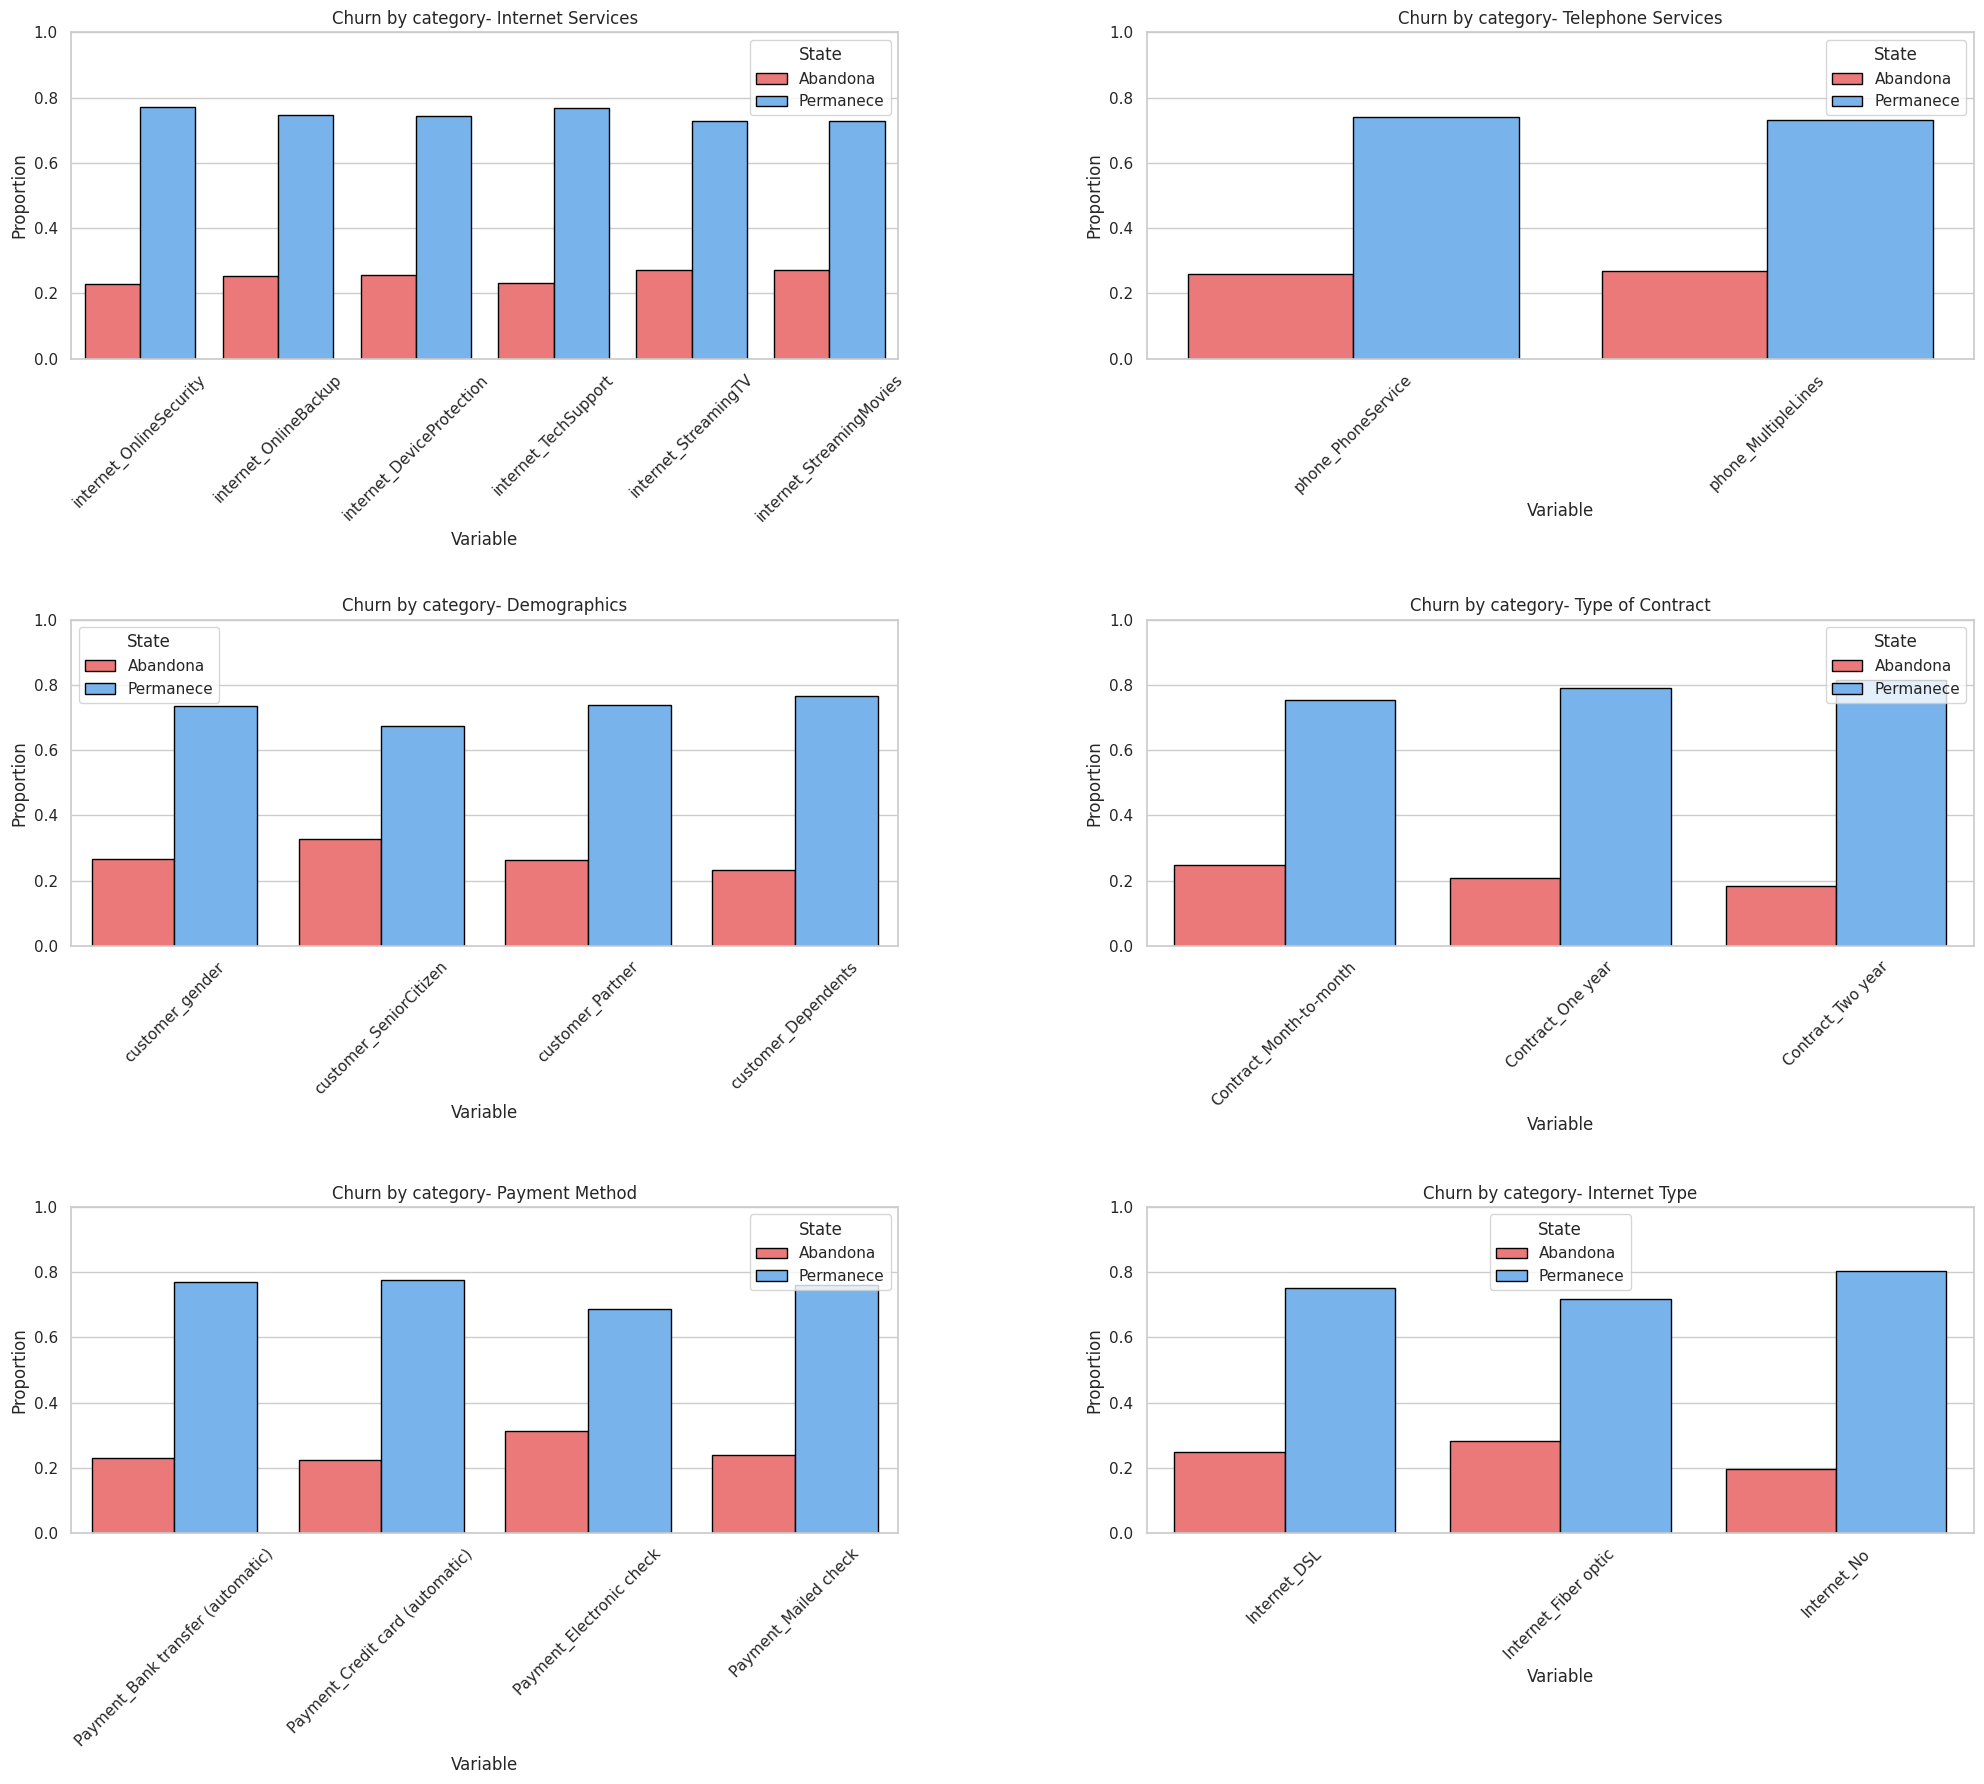

### Analysis by Numerical Variables

We examined how binary variables are linked to the probability of churn.

* 1. Customer Tenure vs. Churn (Time as a Customer):

* Remaining customers: They have a longer average time with the company.

* Churn customers: They tend to have shorter periods of time.

* 2. Monthly Charges vs. Churn (Monthly Charges):

* Churn customers: They tend to have higher monthly charges.

* Remaining customers: They are concentrated in lower billing brackets.

* 3. Total Charges vs. Churn (Total Charges):

* Remaining customers: They have higher accumulated charges, suggesting greater tenure and loyalty.

* Churn customers: They have spent less overall.

* 4. Daily Charges vs. Churn (Eigenvariable):

* Churn customers: They have slightly more daily charges.

* Remaining customers: present a more varied range.


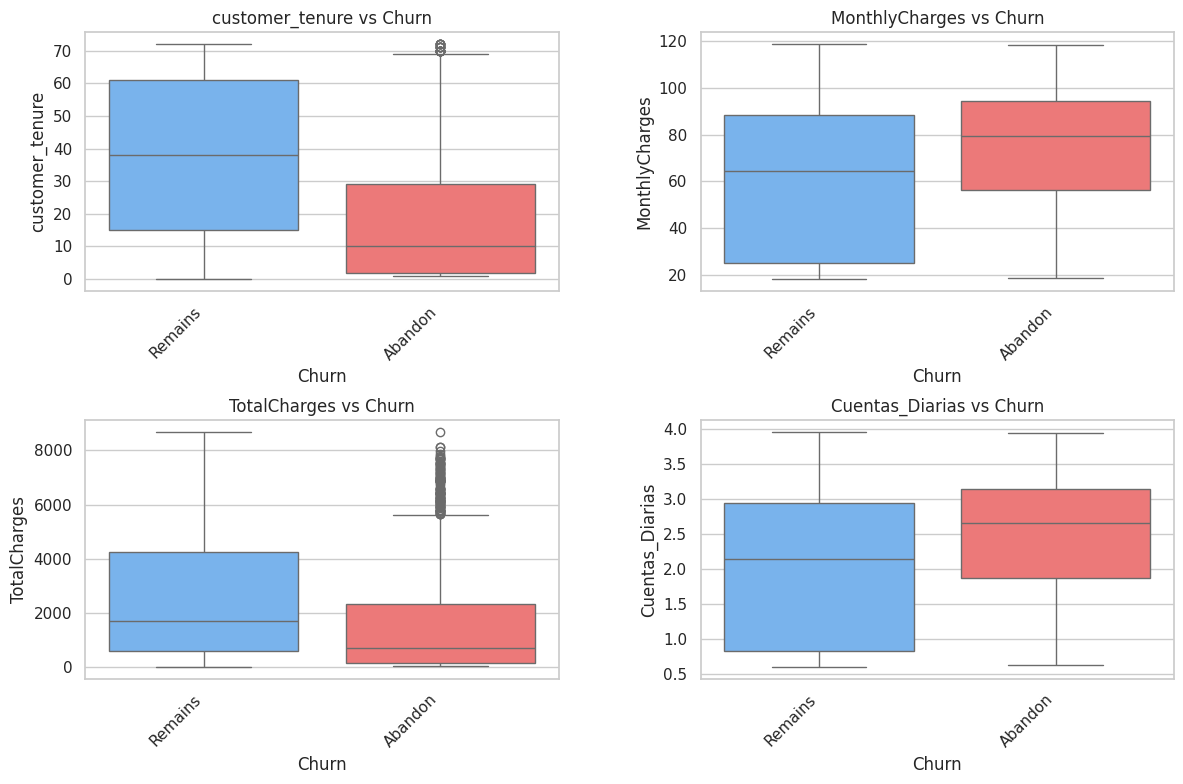

### Binary Variable Analysis

The association between churn and various binary user characteristics was studied.

📌1. Services:

* Variables: Online Security, Backup, Device Protection, Technical Support, TV Streaming, Movie Streaming

* Across all services, customers who do not have the service (No) have a higher churn rate.

* Examples:

* Online Security - No: ~27% churn

* Tech Support - No: ~28% churn

* While those who do have the services, churn falls to 10-14%.

📌2. Phone:

* Variables: Multiple Lines, Phone Service

* Those who do not have Phone Service churn more (26.7%) than those who do (~20%).

* Multiple lines do not have as much influence, although there is a slightly higher churn rate among those who have multiple lines (~28%).

📌 3. Demographics

* Variables: Gender, Senior, Partner, Dependents

* Senior citizens (SeniorCitizen_Yes) have higher churn (41.7%) than non-senior citizens (~23.6%).

* Those without a partner (Partner_No) and without dependents (Dependents_No) have higher churn rates (~30-32%).

* Gender does not seem to influence (same values for both).

📌 4. Contract
* Variables: Month-to-month, 1 year, 2 years

* Monthly contract → very high churn (~43%).

* Annual or biannual contract → very low churn (~12%-2%).

📌 5. Payment Method
* Variables: Bank transfer, Card, Electronic check, Check by mail.

* Electronic checks have the highest churn (~29.5%).

* Automatic methods (bank transfer and credit card) have lower rates (~10-20%).

📌 6. Internet Type

* Variables: DSL, Fiber Optic, No Internet

* Customers with fiber optics have the highest churn (~32%).

* Those without internet or using DSL churn less (~7-14%).


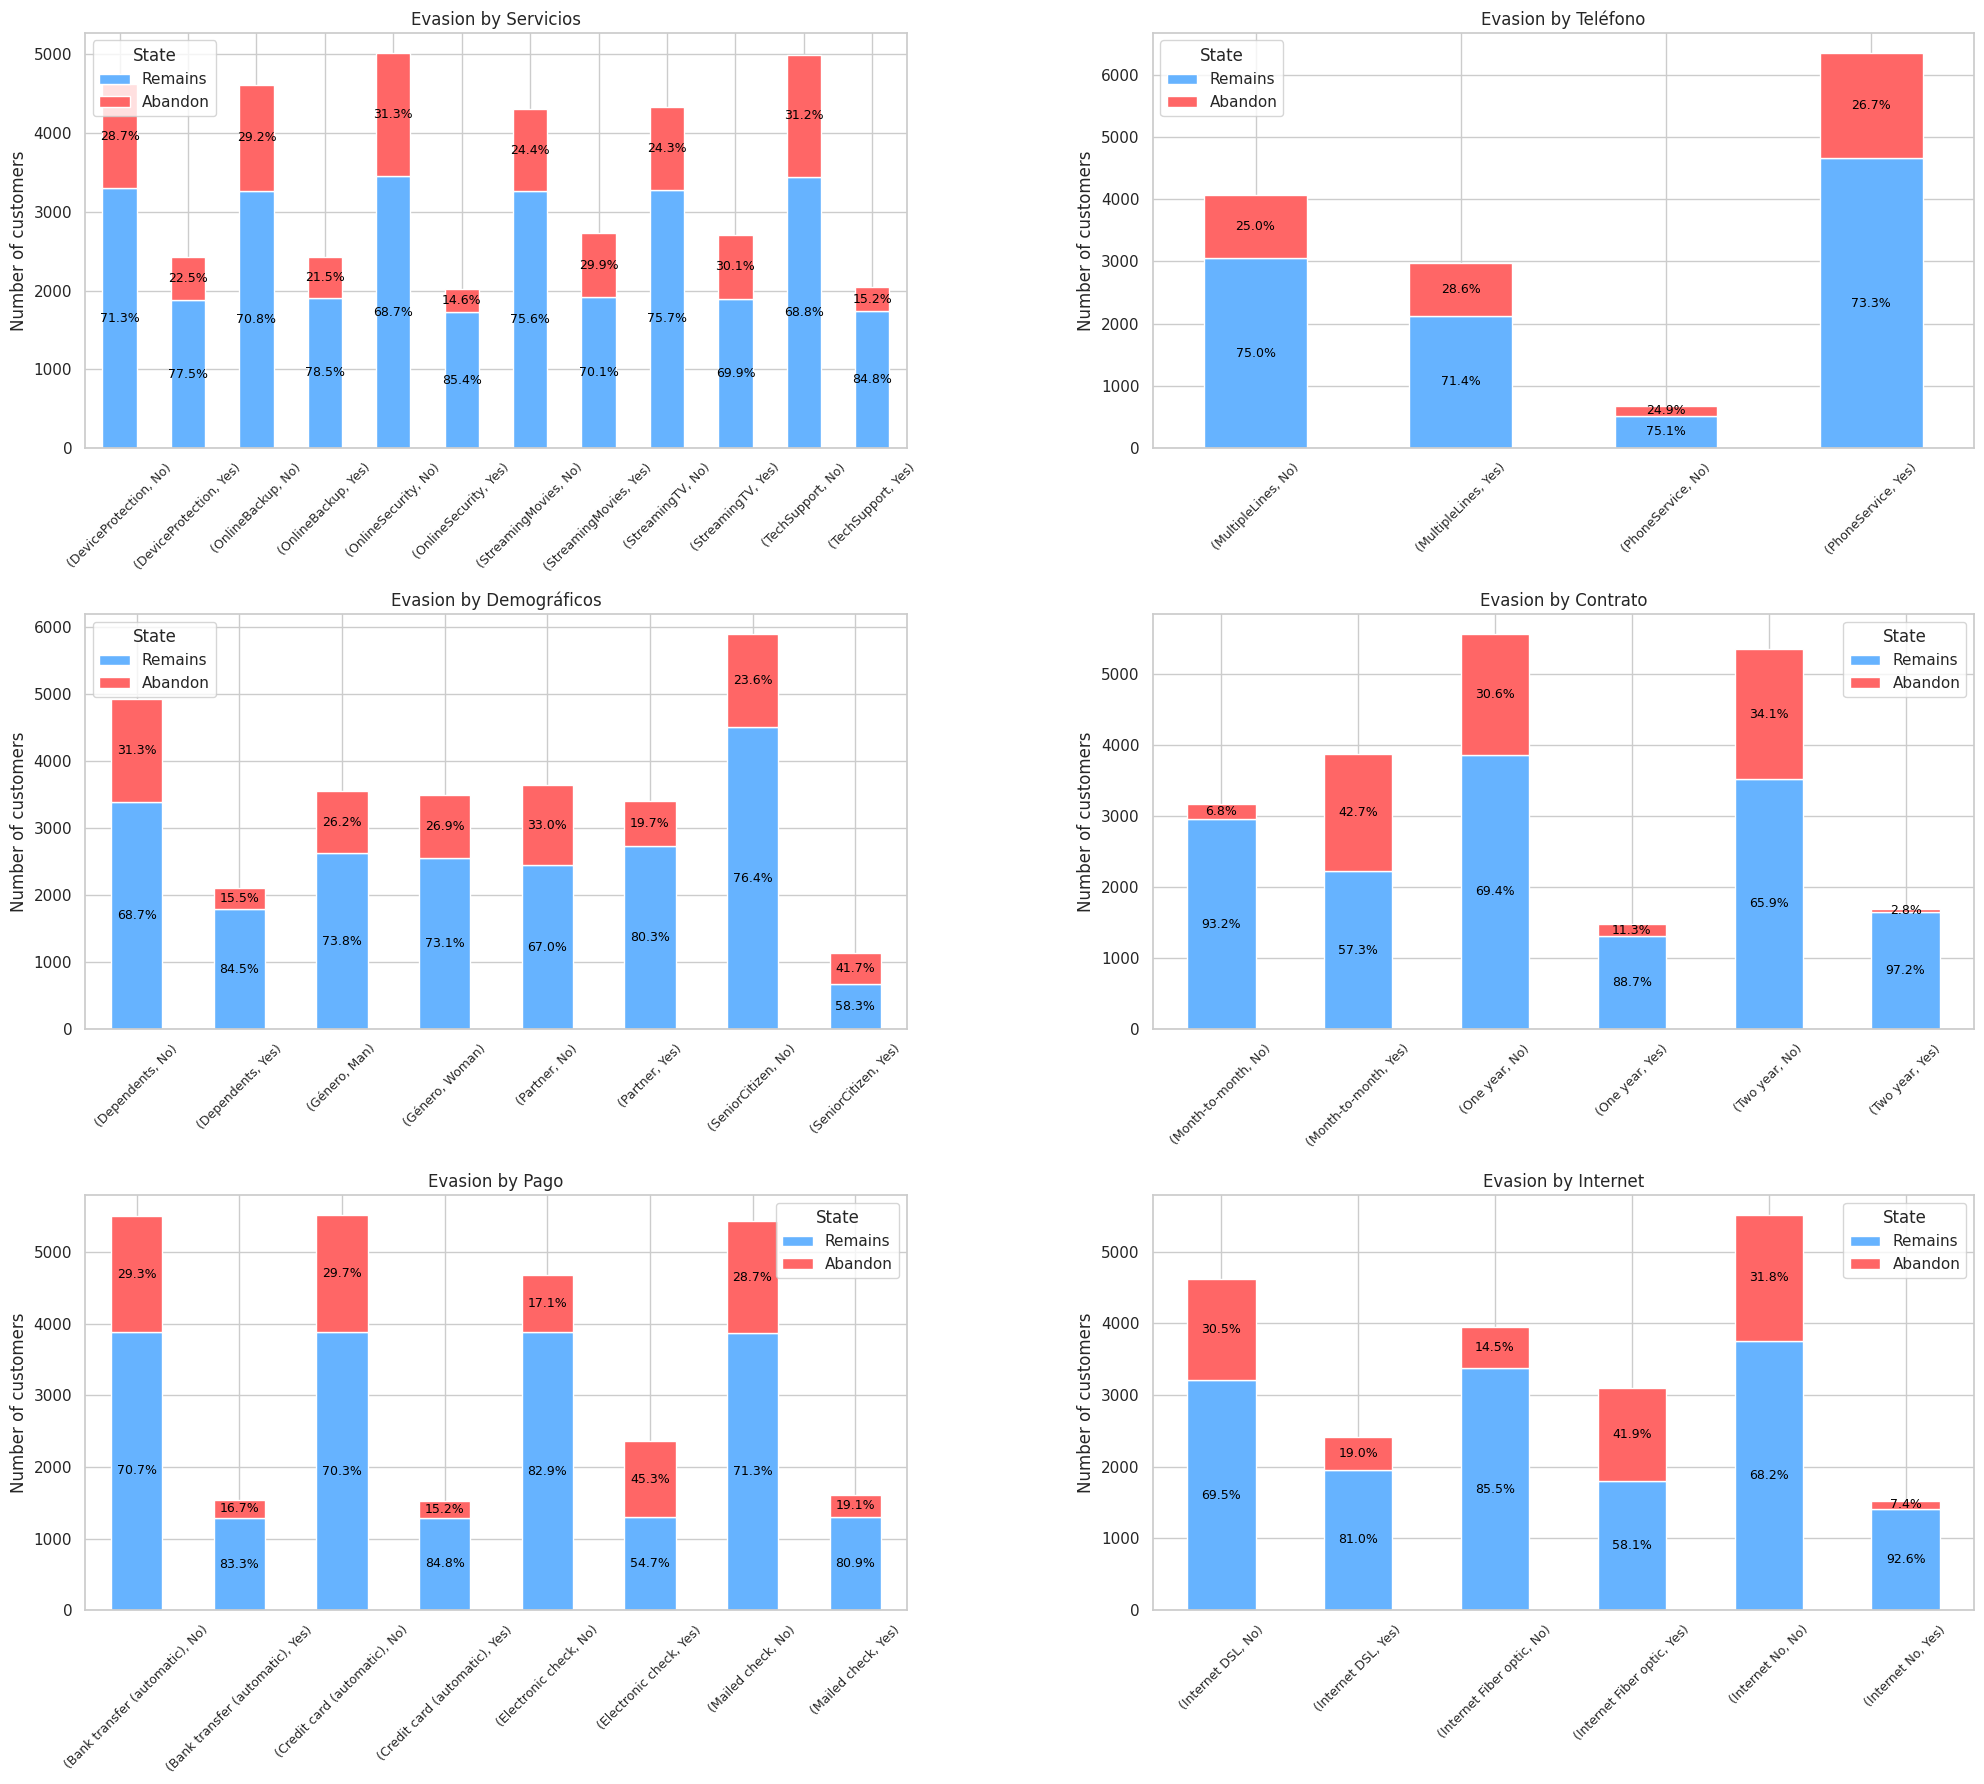

### Heatmap of evasion rates by variable and subcategories

Looking at the graph, the evasion rate percentage can be classified as: Critical (>40%) and Moderately High (30-40%), Average/Expected (15-30%), and Low/Positive (<15%). We will focus on the Critical:

* Monthly contracts: 42.7%
* Fiber optics: 41.9%
* Electronic payments: Critical 45.3%
* Senior customers: Critical 41.7%

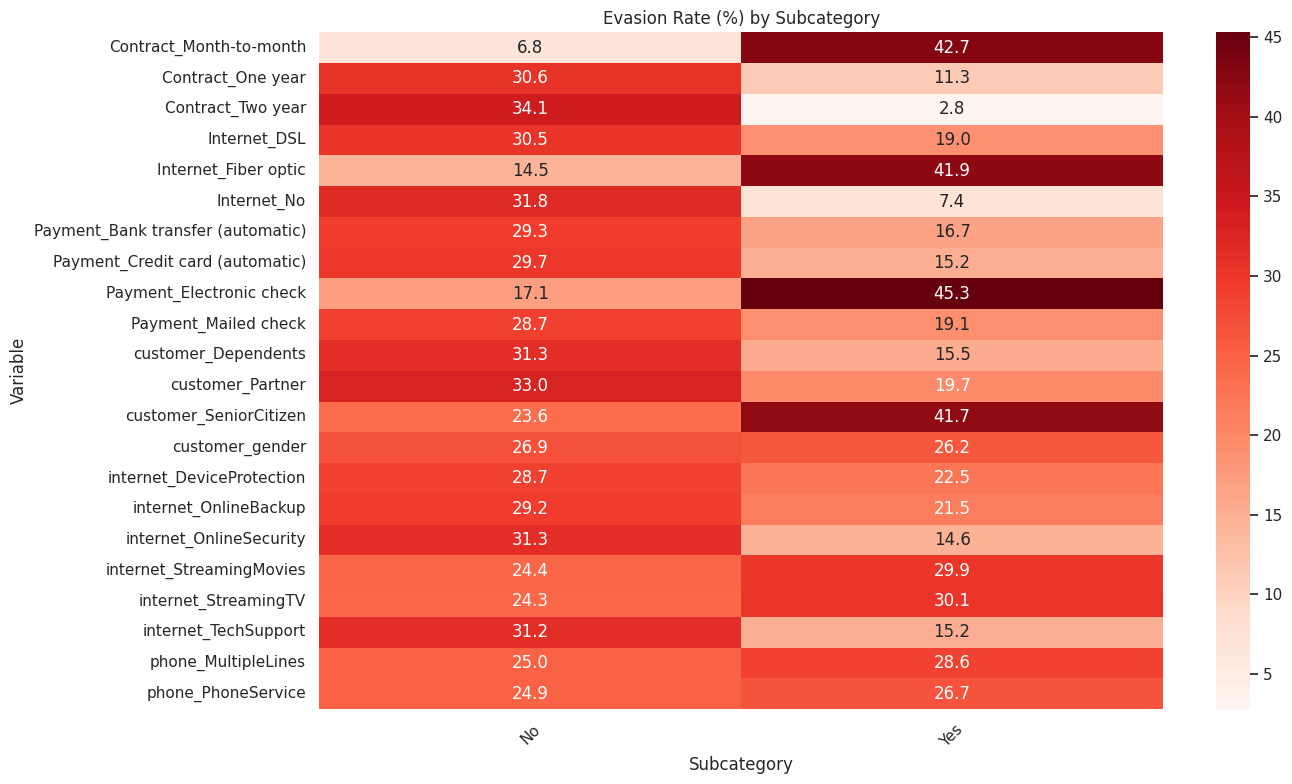

### Sankey diagram with descriptive labels

The following graph reinforces what was stated above and demonstrates that it does not depend on gender:

Higher % evasion:

* Fiber optic


In [ ]:
fig_Sankey.show()

### Heat Map - Correlation with Churn

This heat map shows the Pearson linear correlation between the selected variables and the target variable, Churn (churn). The correlation value ranges from:

* +1: perfect positive correlation (the higher the variable value, the higher the churn).

* -1: perfect negative correlation (the higher the variable value, the lower the churn).

* 0: no linear correlation.

📈 **Variables with the highest positive correlation with churn:**
* Contract_Month-to-month → +0.41

Customers with a monthly contract are more likely to churn.

* Internet_Fiber optic → +0.31

Those with fiber optic services tend to evade more than those without.

* Payment_Electronic check → +0.30

The use of electronic checks is associated with higher churn.

📉 **Variables with the highest negative correlation (protect against churn):**
* customer_tenure → –0.35

The longer the customer's tenure, the lower the likelihood of churn.

* Contract_Two year → –0.30

Two-year contracts are associated with low churn.

* TotalCharges → –0.20

Customers with higher accumulated billing (old customers) tend to stay.

➡️​ **The variables that most influence churn are:**

* Contract type: Monthly contracts are strongly associated with churn, while long-term contracts (two years) reduce it.

* Payment method: E-check appears to be a predictor of high churn.

* Customer tenure (tenure): This is a key factor for retention.

* Internet technology: Surprisingly, those who use fiber optics have higher churn than others.

This analysis reinforces the idea that new customers, those with monthly contracts, paying with minimal automation, and using fiber optics are the ones who leave the most.

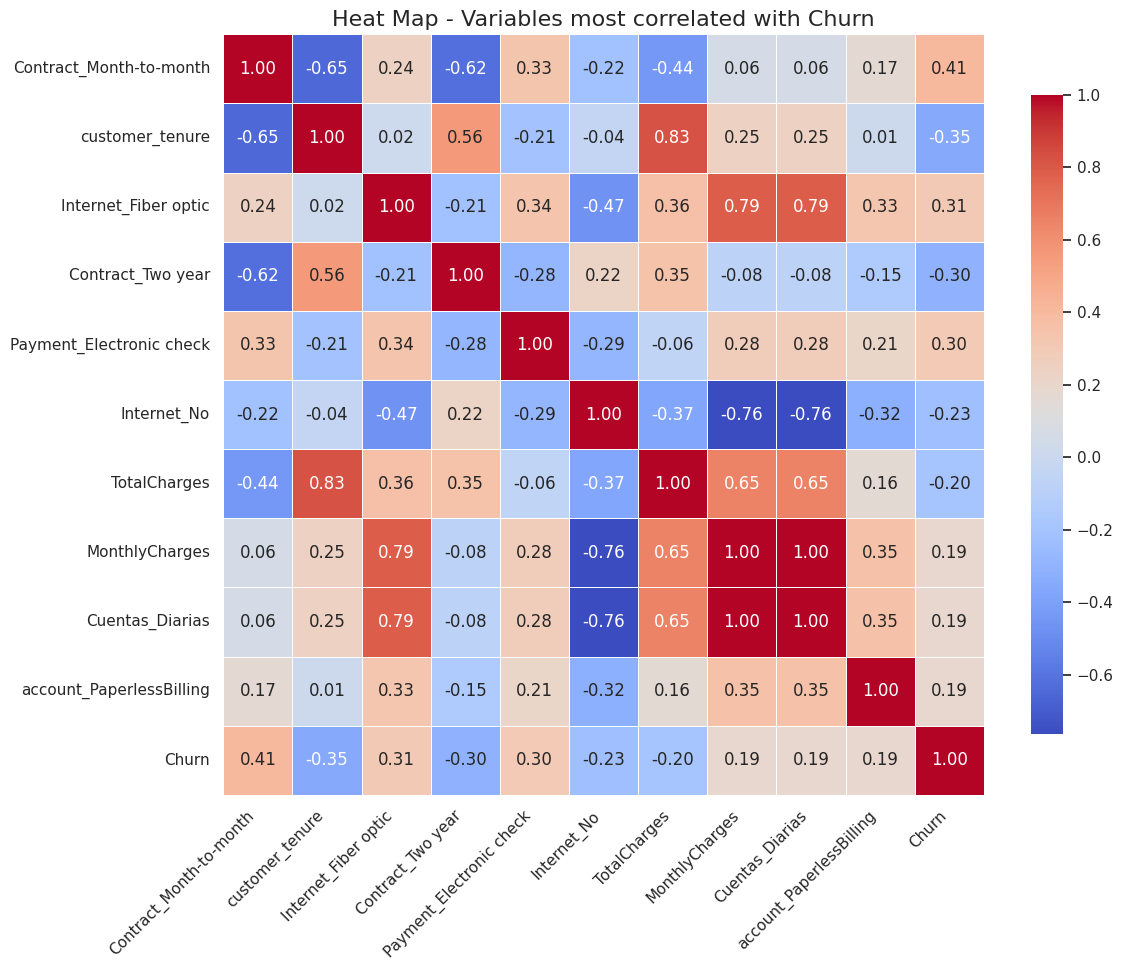

## 4️⃣ Conclusions and Insights:

Comprehensive analysis of customer data reveals a churn rate of 26.5%, with 1,869 customers canceling their service. This churn behavior is strongly influenced by a combination of contractual, demographic, service, and payment method factors.

🔍 Factors that contribute most to churn:

1. Monthly Contract

* This factor has the highest churn rate (~43%) and a high positive correlation with churn (+0.41).

* One- or two-year contracts show a lower probability of churn.

2. Payment by e-check

* This method has a critical churn rate (~45%) and a significant correlation (+0.30).

* Automatic methods such as debit or card are associated with higher loyalty.

3. Internet Type – Fiber Optic

* Customers using fiber optics have a very high churn rate (~42%) and a moderate positive correlation (+0.31).

* This may reflect unmet expectations, service issues, or increased competition in that segment.

4. New Customers

* Customer tenure has a significant negative correlation (–0.35) with churn.

* Customers who churn tend to have less time with the company and low total charges (TotalCharges).

5. Senior Customers and Customers Without Personal Ties

* Senior customers have higher churn rates (~41.7%).

* Higher churn is also observed among those without a partner or dependents.

6. Lack of Additional Services (Security, Support, etc.)

* Customers who do not purchase additional services have a higher churn rate (~27%-28%).

* Having technical support or online security significantly reduces churn.

7. Telephone Service (Multiple Lines, Telephone Service)

* Having telephone service may be associated with longer retention.
* Multiple lines don't change the situation much.

## 5️⃣​Recommendations:

💡 **Early Retention:** Implement loyalty campaigns for new customers during their first few months.

🌐 **Migration to long-term contracts:** Offer incentives or discounts to encourage users to upgrade from monthly to annual or biennial contracts.

💳 **Promote automatic payments:** Encourage the use of payment methods such as credit cards or automatic debit payments, discouraging the use of electronic checks.

📞 **Add value through additional services:** Offer bundles or packages that include online security, technical support, etc.

📉 **Review fiber optic offering:** Evaluate whether the customer experience with fiber optics is aligned with their expectations or if it needs to be improved.

👵 **Segmentation by age and personal situation:** Create specific strategies for senior customers and people without family ties.
